# Handwritten digit recognition

This is a classical problem in machine learning. The aim is to classify hand written digits.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\pablo\Anaconda3\envs\packt\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### 1. Load and visualize the data

In [2]:
# Load the digits dataset
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

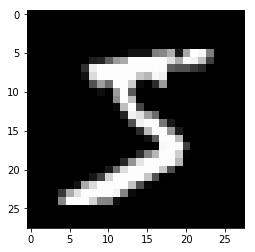

In [3]:
plt.imshow(X_train[0], cmap="gray")

#### 2. Reshape everything: From matrix to array

One way of modelling the classification problem is to "flatten out" the matrix that represents the digits into an array, and apply standard supervised learning algorithms. 

Another alternative (exercise!) would be to use convolutional neural networks. 

The preprocessing is slightly different, but both architectures are supported in `keras`, so you can quickly prototype there.

In [4]:

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#### 3. Define the model

We use `keras` API to define the model.

In [5]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


#### 4. Train the model and interprete the results

In [7]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 98us/step - loss: 6.2908 - acc: 0.6035 - val_loss: 5.6400 - val_acc: 0.6479
Epoch 2/5
48000/48000 [==============================] - 4s 86us/step - loss: 5.6436 - acc: 0.6473 - val_loss: 5.6125 - val_acc: 0.6498
Epoch 3/5
48000/48000 [==============================] - 4s 83us/step - loss: 5.5585 - acc: 0.6530 - val_loss: 5.5449 - val_acc: 0.6537
Epoch 4/5
48000/48000 [==============================] - 4s 90us/step - loss: 5.4538 - acc: 0.6598 - val_loss: 5.4807 - val_acc: 0.6585
Epoch 5/5
48000/48000 [==============================] - 5s 104us/step - loss: 5.4256 - acc: 0.6620 - val_loss: 5.4714 - val_acc: 0.6585


In [8]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 19us/step


[5.3979205245971675, 0.6639]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


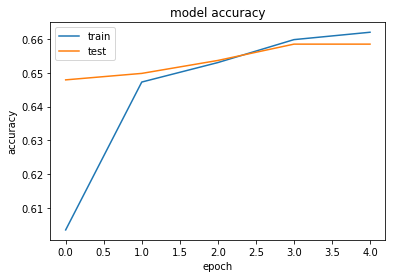

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

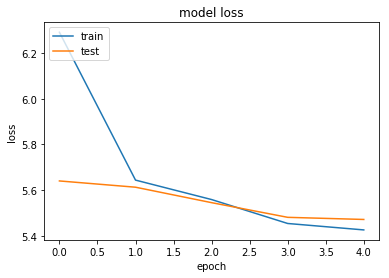

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 5. Iterate!

You should change the architechture or hyperparameters until you are satisfied with the result. 

In the default mode, we see that we have low variance (train and test error go together) but very high bias (the model has low accuracy). In this case, the recommendation is to try a more sophisticated model, for instance, adding more layers.

Once you are happy you can save the model with the command below.

In [12]:
model.save_weights('model.h5')